<a href="https://colab.research.google.com/github/cteplovs/si999/blob/master/Intro_to_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Principal Component Analysis
The goal of principal component analysis (PCA) is to reduce a set of data with multiple variables down to a smaller number of variables. In the videos, we showed you how to do PCA using scikit-learn. This exercise will walk you through the process of doing PCA yourself. Please make sure all your code comes directly after the step that asks for it. (I.e. Import the data right after Step 1, etc.)


_**Step 1:** Import the Boston dataset by running sklearn.datasets.load_\__boston(). This is a dataset of home features and prices in census tracts around Boston from the 1970 census._

In [0]:
import numpy as np
from sklearn import datasets
boston_obj = datasets.load_boston()

_**Step 2:** Examine the data to find the names of the 13 features and the number of data points. Do not include the actual median home prices, which is "target"._

In [0]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 62kB/s 
     |████████████████████████████████| 204kB 53.5MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=39173241587fe05688fb299774ca3921f72f5db5d9dcdb09b26f3efd0ccf21c4
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [0]:
import pyspark

In [2]:
boston_obj.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
boston = boston_obj.data
boston.shape

(506, 13)

In [4]:
boston

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

_**Step 3:** Standardize your data using sklearn.preprocessing.StandardScaler()._


In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
boston = scaler.fit_transform(boston)

_**Step 4:** Perform PCA on the feature set by using sklearn.decomposition.PCA_


In [17]:
from sklearn import decomposition
mypca = decomposition.PCA(tol=.000001, iterated_power=40, random_state=1)
mypca.fit(boston)

PCA(copy=True, iterated_power=40, n_components=None, random_state=1,
    svd_solver='auto', tol=1e-06, whiten=False)

_**Step 5:** Calculate the amount of variance explained by each component. How many principal components would you keep?_

In [18]:
print(mypca.explained_variance_ratio_)

[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]


In [19]:
print(mypca.explained_variance_ratio_.round(3))

[0.471 0.11  0.096 0.066 0.064 0.051 0.041 0.03  0.021 0.017 0.014 0.013
 0.005]


<span style="color:blue">I would keep the first two components, because together they explain 97% of the variance.</span>

_**Step 6:** Plot the data with the first principal component on the x-axis and the second principal component on the y-axis. As a check on your work, your plot should look like this:_
![pca_plot.png](attachment:pca_plot.png "PC1 versus PC2 boston")

In [0]:
import matplotlib.pyplot as plt
new_coords = mypca.transform(boston)

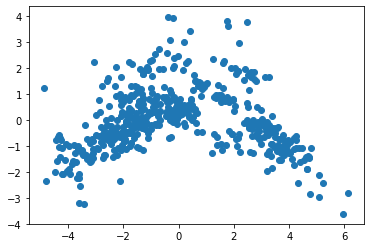

In [21]:
plt.scatter(new_coords[:,0], new_coords[:,1])